<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/07_Encodings_y_PCA_en_Melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Encodings

In this notebook, we are going to upload the [Kaggle competition](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) dataset on estimating property sales prices in Melbourne, Australia.

We will use the reduced dataset produced by [DanB](https://www.kaggle.com/dansbecker). We have uploaded a copy to a server at the National University of Córdoba to facilitate remote access.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [2]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.8.2'

In [3]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [4]:
melb_df = pandas.read_csv('../data/melb_data.csv')
melb_df[:3]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Encoding non-numerical values

So far we have performed data analysis on different types of random variables. However, many methods used for *Machine Learning* can only be applied to numerical arrays.

Therefore, before starting any kind of modeling, we have to **encode** all the categorical information using only numerical information. When doing this process we have to take into account some properties that our encoded data will have, and how they will impact the models.

### One-hot encodings

The simplest way to do this encoding of categorical values ​​is to build a One-Hot encoding vector. It operates as follows:

1. The set $C$ of possible categories of the random variable is identified and the number of categories $N = |C|$
2. An integer is assigned to each category in the range $[0; N)$.
3. For each value $r_i$ of our data set with category $c_j$:

  1. A vector $x_i$ of 0s of size $N$ is constructed.
  2. The value 1 is assigned to the vector $x_i$ at the category position $c_j$.

We will start working with the scikit-learn library, which has most of the functions necessary to pre-process a data set and has tutorials that explain the different options. We recommend the [Encoding Categorical Features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) section.

We will use the *OneHotEncoder* class to do the encoding. All scikit-learn transformers follow the same two-stage interface: `fit` and `transform`.
* The `fit` method (train) is responsible for collecting all the information necessary to apply the encoding. In this case, implement steps 1 and 2 of the previous algorithm.
* The `transform` method is the one that actually builds the encodings for each row of the dataset.

In [5]:
melb_df[['Type']]

,Type
0,h
1,h
2,h
3,h
4,h
...,...
13575,h
13576,h
13577,h
13578,h


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_df[['Type', 'Suburb']])
# We can inspect the categories found by the encoder
encoder.categories_

[array(['h', 't', 'u'], dtype=object),
 array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
        'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
        'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
        'Avondale Heights', 'Bacchus Marsh', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaconsfield',
        'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh',
        'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn',
        'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia',
        'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East',
        'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick',
        'Brunswick East', 'Brunswick West', 'Bulleen', 'Bullengarook',
        'Bundoora', 'Burnley', 'Burnside', 'Burnside Heights', 'Burwood',
        'Burwood East', 'Cairnlea', 'Camberwell', 'Campbel

In [7]:
encoded_types = encoder.transform(melb_df[['Type', 'Suburb']])
encoded_types[:10]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [8]:
encoded_types[:10].shape

(10, 317)

This transformation is so common that Scikit-lean implements the `DictVectorizer` transformer which automatically encodes all categorical columns and combines them with the existing numeric data.

In order to use it, we will need to convert the dataset into a list of dictionaries.

In [9]:
feature_cols = ['Suburb', 'Type', 'Distance', 'Bedroom2', 'Bathroom',
            'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname']
feature_dict = list(melb_df[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'Suburb': 'Abbotsford',
  'Type': 'h',
  'Distance': 2.5,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Car': 1.0,
  'Landsize': 202.0,
  'BuildingArea': nan,
  'YearBuilt': nan,
  'Regionname': 'Northern Metropolitan'},
 {'Suburb': 'Abbotsford',
  'Type': 'h',
  'Distance': 2.5,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Car': 0.0,
  'Landsize': 156.0,
  'BuildingArea': 79.0,
  'YearBuilt': 1900.0,
  'Regionname': 'Northern Metropolitan'}]

In [10]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [11]:
feature_matrix

<13580x332 sparse matrix of type '<class 'numpy.float64'>'
	with 135800 stored elements in Compressed Sparse Row format>

In [12]:
vec.get_feature_names_out()[:10]

array(['Bathroom', 'Bedroom2', 'BuildingArea', 'Car', 'Distance',
       'Landsize', 'Regionname=Eastern Metropolitan',
       'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan',
       'Regionname=Northern Victoria'], dtype=object)

## sparse arrays

One-hot encodings have the property of increasing the amount of memory required to store a variable **quadratically** with respect to the number of categories. However, most elements of the new representation will be null. The number of non-zero elements in the matrix grows **linearly** with respect to the number of categories to represent.

That is why there are *sparse arrays*, which store only the non-null values of an array in different data structures.

Encoding methods like `DictVectorizer` or `OneHotEncoding` usually return sparse arrays if it is more efficient in terms of computational resources.

![picture](https://matteding.github.io/images/coo.gif)

There are [different types of sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html) and the operations on each of them are different; and different from dense matrices.

In [13]:
# Fill nan values on sparse matrix.
if numpy.any(numpy.isnan(feature_matrix.data)):
  feature_matrix.data = numpy.nan_to_num(feature_matrix.data)

To apply some transformations or models it is necessary to convert the sparse matrices to dense ones. Before making this change, it is recommended to calculate the size of the final array. Remember that each floating point number occupies 4 bytes for single precision (numpy.float32) and 8 bytes for double precision (numpy.float64).

In [14]:
# Before doing this type of conversion, it's mandatory to calculate the
# size of the resulting matrix!
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = numpy.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 17.20 MB
Matrix too big! Using only first 7895 of 13580 rows
Final size: 10.00


In [15]:
# Remember to cut your original data as well.
if dense_feature_matrix.shape[0] < len(melb_df):
  melb_df_sample = melb_df.iloc[:dense_feature_matrix.shape[0]]
else:
  melb_df_sample = melb_df

## Dimensionality reduction with PCA

In the following rows, we will apply [PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca) to reduce the dimensionality of the data set to 2 dimensions. A process similar to that seen in the 06 notebook will be followed.

In [16]:
# TODO Here we have to pre-process the matrix before applying PCA
scaled_dense_feature_matrix = dense_feature_matrix

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

/user/nocampo/home/miniconda3/envs/sald/lib/python3.10/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/user/nocampo/home/miniconda3/envs/sald/lib/python3.10/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(7895, 15)

In [18]:
pca.explained_variance_ratio_

array([6.37925446e-01, 3.56073320e-01, 5.98898716e-03, 5.13427631e-06,
       4.98282702e-07, 2.23438306e-07, 1.67116639e-07, 1.03559216e-07,
       9.63218127e-08, 7.86618060e-08, 4.34447642e-08, 3.65196797e-08,
       1.05552846e-08, 9.48445589e-09, 8.83088358e-09], dtype=float32)

In [19]:
melb_df_sample.loc[:, ['pca1_scaled', 'pca2_scaled']] = proyected_features[:,:2]

/tmp/ipykernel_219942/3561568050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df_sample.loc[:, ['pca1_scaled', 'pca2_scaled']] = proyected_features[:,:2]


<AxesSubplot:xlabel='pca1_scaled', ylabel='pca2_scaled'>

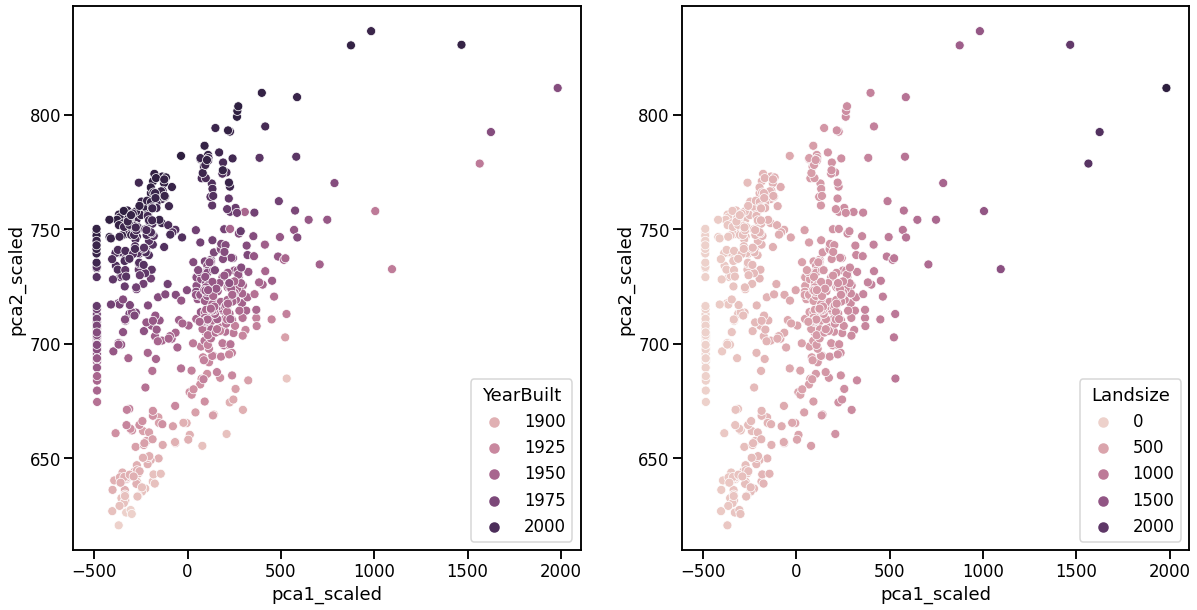

In [20]:
cols = ['YearBuilt', 'Landsize']
data = melb_df_sample[cols + ['pca1_scaled', 'pca2_scaled']][:1000].dropna(how='any')
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# Other variables to try: 'Price' 'Landsize' 'Price' 'YearBuilt'
seaborn.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled',
                    hue='YearBuilt', ax=axes[0])  
seaborn.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled',
                    hue='Landsize', ax=axes[1]) 

### Correlation analysis (visual) with other variables

Data projected with methods like PCA is no longer directly interpretable: each column does not correspond to a property of the data, but is a **combination** of the previous properties.

However, through the visualizations we can understand how much weight each of the original variables has in our new transformation. In the graph above we can see that one of the addresses corresponds to the year of construction and the other to the number of meters built.

**Why is this happening?** Because the variables are not in the same units. since the year values are very large, that column has the largest **variance** in the data, and therefore the first principal components are very well aligned with that dimension.

We have to rescale all the data to the same range. Do we use standardization or linear scaling?

### How many main components to use?

When we want to visualize a data set with too many dimensions, we project the points to 2D or 3D. However, if the goal is to generate a smaller array

Text(0.5, 0, 'Components')

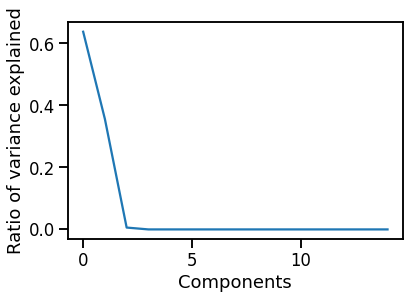

In [21]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")